**Problem Statement:**

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. We will use the data given to predict the price used cars.


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')


In [116]:
info=pd.read_csv('Data Dictionary-2.csv')
info

,Column Name,Description
0,Id,Car ID
1,Maker,Car Maker Name
2,model,Car Model
3,Location,Car RC Location
4,Distance,Total Kilometers run
5,Owner Type,Number of owner
6,manufacture_year,Year of Manufacturing
7,Age of car,Total Age of Car
8,engine_displacement,Total Engine Displacement
9,engine_power,Total Engine Power


In [117]:
train=pd.read_csv('Training Data Set.csv')
train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [118]:
test=pd.read_csv('Test Data Set.csv')
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [119]:
# Adding a new column so that it would be easy to split the data back
train['data']='train'
test['data']='test'

In [120]:
print(train.shape)
print(test.shape)


(53515, 18)
(5615, 17)


In [121]:
df= pd.concat([train,test], sort = False , ignore_index= True)
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price,data
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25,train
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25,train
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50,train
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50,train
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50,train


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59130 entries, 0 to 59129
Data columns (total 18 columns):
Id                     59130 non-null int64
Maker                  59130 non-null object
model                  59130 non-null object
Location               59130 non-null object
Distance               57791 non-null float64
Owner Type             59130 non-null object
manufacture_year       59130 non-null int64
Age of car             59130 non-null int64
engine_displacement    59130 non-null int64
engine_power           57523 non-null float64
body_type              4558 non-null object
Vroom Audit Rating     59130 non-null int64
transmission           59130 non-null object
door_count             59130 non-null object
seat_count             59130 non-null object
fuel_type              59130 non-null object
Price                  53515 non-null float64
data                   59130 non-null object
dtypes: float64(3), int64(5), object(10)
memory usage: 8.1+ MB


In [123]:
df['Id'].nunique()
# Since ID is unique we can drop it from the train data later

59130

#### Analysing the categorical variables

In [124]:
objects=[]
for i in df.drop('data',1).columns:
    if df[i].dtype=='O':
        objects.append(i)
objects 

['Maker',
 'model',
 'Location',
 'Owner Type',
 'body_type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [125]:
for i in objects:
    print(i,':','\n')
    print(train[i].value_counts(1)*100)

Maker : 

skoda       40.293376
toyota      14.650098
audi        13.689620
bmw         13.413062
nissan      10.249463
hyundai      4.185742
fiat         3.447632
maserati     0.071008
Name: Maker, dtype: float64
model : 

octavia     23.580305
superb       5.970289
yaris        5.934785
qashqai      5.333084
x3           5.192937
x1           4.522097
i30          3.825096
q5           3.810147
x5           3.698029
yeti         3.546669
panda        3.305615
q3           3.243950
coupe        3.195366
micra        3.131832
auris        3.113146
avensis      2.825376
aygo         2.776792
rapid        2.632907
roomster     2.470335
q7           2.326451
citigo       2.092871
juke         1.784546
tt           1.687377
Name: model, dtype: float64
Location : 

Coimbatore    9.298328
Kochi         9.285247
Bangalore     9.115201
Jaipur        9.100252
Kolkata       9.096515
Pune          9.085303
Mumbai        9.081566
Chennai       9.032981
Delhi         9.014295
Hyderabad     8.976922

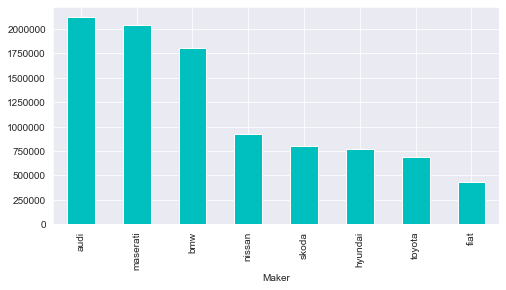

In [126]:
plt.figure(figsize=(8,4))
train.groupby('Maker').mean()['Price'].sort_values(ascending=False).plot(kind='bar',color=['c'])
plt.show()

* It is very evident that Audi has the highest price followed by maserati and BMW.

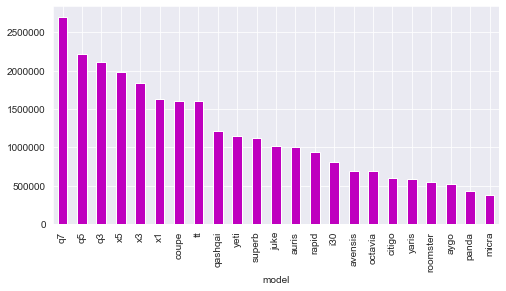

In [127]:
plt.figure(figsize=(8,4))
train.groupby('model').mean()['Price'].sort_values(ascending=False).plot(kind='bar',color=['m'])
plt.show()

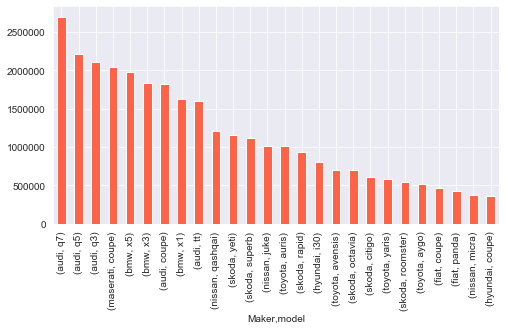

In [128]:
plt.figure(figsize=(8,4))
(train.groupby(['Maker','model']).mean()['Price'].sort_values(ascending=False)).plot(kind='bar',color=['tomato'])
plt.show()

* All Models of audi have higher price than the rest.
* Maserati just have one model names coupe.

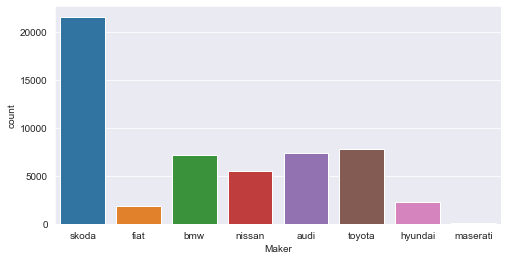

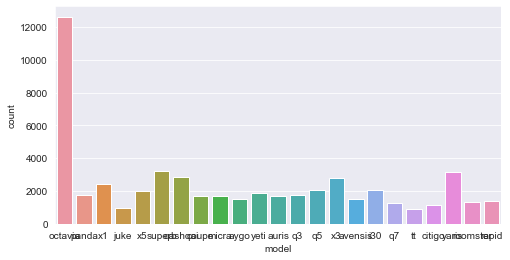

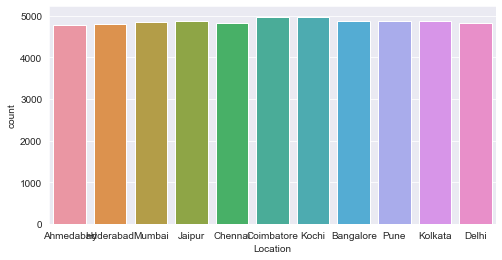

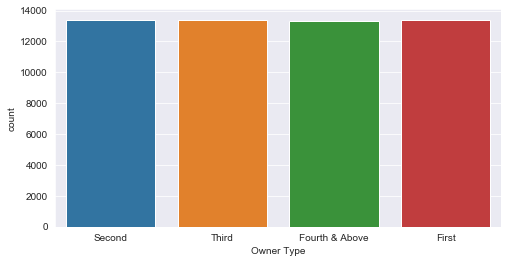

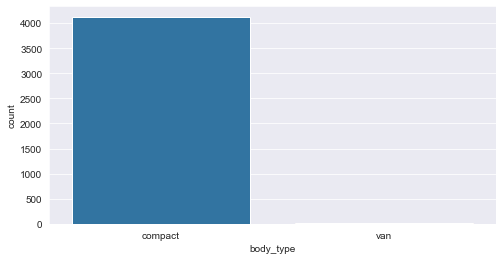

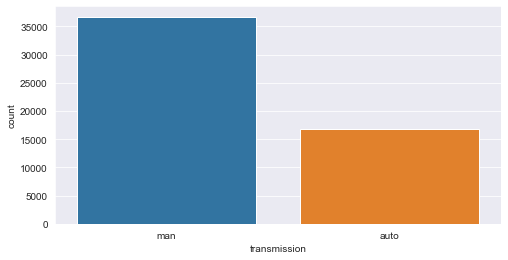

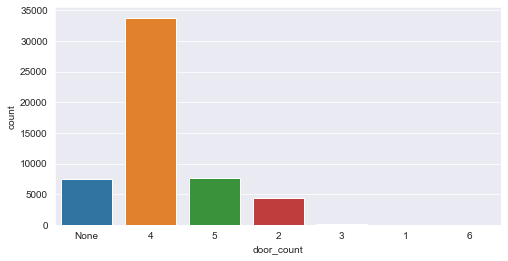

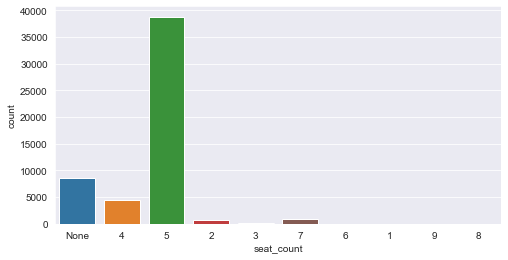

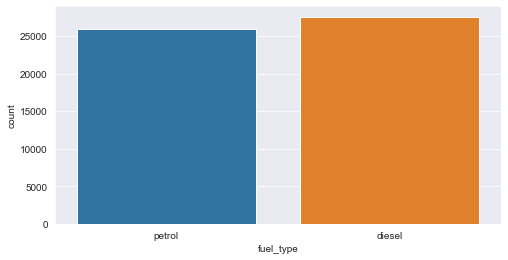

In [130]:
for i in objects:
    plt.figure(figsize=(8,4))
    sns.countplot(train[i])
    plt.show()

In [217]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'Price', 'data'],
      dtype='object')

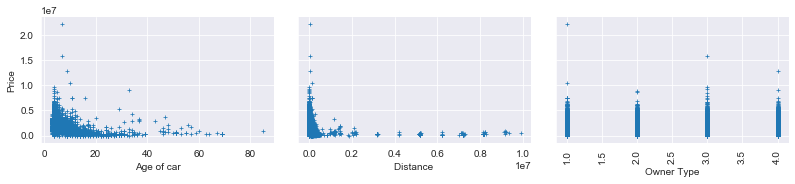

In [241]:
sns.pairplot(x_vars=['Age of car', 'Distance ', 'Owner Type'],y_vars=['Price'],data=df,markers="+",plot_kws=dict(s=10),aspect=1.5)
plt.show()

* Lower the age higher the price of the car.
* Lower distance have higher selling price and there are very few cars with very high distance.
* Number of previous owners is not a determining factor of price.

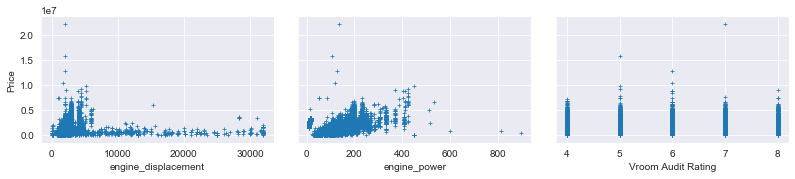

In [242]:
sns.pairplot(x_vars=['engine_displacement', 'engine_power','Vroom Audit Rating'],y_vars=['Price'],data=df,markers="+",plot_kws=dict(s=10),aspect=1.5)
plt.show()

* Lower Engine displacement have higher price but after Engine displacement reaches 10000 the price remains very low.
* Enging power have a positive correlation with the price.
* Vroom Audit rating doesnot seem to have an impact on the price.

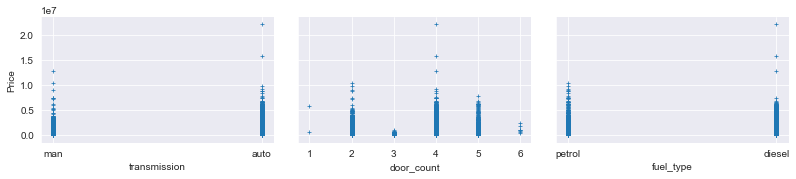

In [244]:
sns.pairplot(x_vars=['transmission', 'door_count', 'fuel_type'],y_vars=['Price'],data=df,markers="+",plot_kws=dict(s=10),aspect=1.5)
plt.show()

* Automatic cars have higher selling price.
* Higher price cars either have 4 doors or 2 doors.
* There are few diesel cars with very high price. 

### Converting few categorical to numerical

**Owner Type**

In [131]:
df['Owner Type']=df['Owner Type'].replace({'First':1,'Second':2, 'Third':3, 'Fourth & Above':4})

**Door Count**

In [132]:
for i in df['Maker'].unique():        
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0: # If the model maker combination exists then we take the count
            print(i,j)
            print(df[(df['Maker']==i) & (df['model']==j)]['door_count'].value_counts())
            print()

skoda octavia
4       5654
5       5026
None    3269
6          2
2          1
Name: door_count, dtype: int64

skoda superb
4       1960
None     802
5        772
6          1
3          1
Name: door_count, dtype: int64

skoda yeti
4       1531
5        321
None     225
6          1
Name: door_count, dtype: int64

skoda citigo
4       531
2       388
5       151
3       122
None     26
Name: door_count, dtype: int64

skoda roomster
4       859
5       423
None    179
1         1
Name: door_count, dtype: int64

skoda rapid
4       1094
5        413
None      61
Name: door_count, dtype: int64

fiat panda
4       1600
None     170
2        134
5         59
3          1
Name: door_count, dtype: int64

fiat coupe
2       67
None    11
4        2
3        1
Name: door_count, dtype: int64

bmw x1
4       2374
None     238
5         45
2          3
Name: door_count, dtype: int64

bmw x5
4       1869
None     170
5        121
2          1
Name: door_count, dtype: int64

bmw x3
4       2461
None

Most of the categories have 'None' number of doors, which is not possible. But same model will have same number of doors. Hence we will replace 'None' with the mode value of each category.


In [133]:
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            df.loc[(df['Maker']==i) & (df['model']==j),'door_count']=df.loc[(df['Maker']==i) & (df['model']==j),'door_count'].replace({"None":df.loc[(df['Maker']==i) & (df['model']==j),'door_count'].mode()[0]})
            

In [134]:
# Checking if all the 'None' have been replaced
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            print(df[(df['Maker']==i) & (df['model']==j)]['door_count'].value_counts())
            print()

skoda octavia
4    8923
5    5026
6       2
2       1
Name: door_count, dtype: int64

skoda superb
4    2762
5     772
6       1
3       1
Name: door_count, dtype: int64

skoda yeti
4    1756
5     321
6       1
Name: door_count, dtype: int64

skoda citigo
4    557
2    388
5    151
3    122
Name: door_count, dtype: int64

skoda roomster
4    1038
5     423
1       1
Name: door_count, dtype: int64

skoda rapid
4    1155
5     413
Name: door_count, dtype: int64

fiat panda
4    1770
2     134
5      59
3       1
Name: door_count, dtype: int64

fiat coupe
2    78
4     2
3     1
Name: door_count, dtype: int64

bmw x1
4    2612
5      45
2       3
Name: door_count, dtype: int64

bmw x5
4    2039
5     121
2       1
Name: door_count, dtype: int64

bmw x3
4    2977
5      83
6       1
Name: door_count, dtype: int64

nissan juke
4    1029
5      26
2       1
Name: door_count, dtype: int64

nissan qashqai
4    3031
5     118
2       3
6       3
Name: door_count, dtype: int64

nissan micra
4  

In [135]:
df['door_count'].value_counts()

4    45546
5     8405
2     4964
3      204
6        9
1        2
Name: door_count, dtype: int64

In [136]:
# Setting number of doors as a numeric value.
df['door_count']=df['door_count'].astype('int64')

**Seat Count**

In [137]:
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            print(df[(df['Maker']==i) & (df['model']==j)]['seat_count'].value_counts())
            print()

skoda octavia
5       10163
None     3730
4          50
7           4
6           3
2           2
Name: seat_count, dtype: int64

skoda superb
5       2650
None     881
4          4
6          1
Name: seat_count, dtype: int64

skoda yeti
5       1771
None     297
4          8
6          1
9          1
Name: seat_count, dtype: int64

skoda citigo
4       955
None    152
5       111
Name: seat_count, dtype: int64

skoda roomster
5       1179
None     252
2         29
4          2
Name: seat_count, dtype: int64

skoda rapid
5       1351
None     198
4         18
6          1
Name: seat_count, dtype: int64

fiat panda
4       1184
5        477
None     225
2         78
Name: seat_count, dtype: int64

fiat coupe
4       64
None    16
5        1
Name: seat_count, dtype: int64

bmw x1
5       2477
None     180
4          3
Name: seat_count, dtype: int64

bmw x5
5       1828
None     216
7        107
4          7
6          2
9          1
Name: seat_count, dtype: int64

bmw x3
5       2769
Non

Most of the categories have 'None' as seat count, which is not possible. But mostly same model will have same number of seats. Hence we will replace 'None' with the mode value of each category.


In [138]:
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            df.loc[(df['Maker']==i) & (df['model']==j),'seat_count']=df.loc[(df['Maker']==i) & (df['model']==j),'seat_count'].replace({"None":df.loc[(df['Maker']==i) & (df['model']==j),'seat_count'].mode()[0]})
            

In [139]:
# Checking
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            print(df[(df['Maker']==i) & (df['model']==j)]['seat_count'].value_counts())
            print()

skoda octavia
5    13893
4       50
7        4
6        3
2        2
Name: seat_count, dtype: int64

skoda superb
5    3531
4       4
6       1
Name: seat_count, dtype: int64

skoda yeti
5    2068
4       8
6       1
9       1
Name: seat_count, dtype: int64

skoda citigo
4    1107
5     111
Name: seat_count, dtype: int64

skoda roomster
5    1431
2      29
4       2
Name: seat_count, dtype: int64

skoda rapid
5    1549
4      18
6       1
Name: seat_count, dtype: int64

fiat panda
4    1409
5     477
2      78
Name: seat_count, dtype: int64

fiat coupe
4    80
5     1
Name: seat_count, dtype: int64

bmw x1
5    2657
4       3
Name: seat_count, dtype: int64

bmw x5
5    2044
7     107
4       7
6       2
9       1
Name: seat_count, dtype: int64

bmw x3
5    3048
4      11
2       1
7       1
Name: seat_count, dtype: int64

nissan juke
5    1056
Name: seat_count, dtype: int64

nissan qashqai
5    2782
7     362
4       7
2       2
6       1
8       1
Name: seat_count, dtype: int64

nissa

In [140]:
df['seat_count'].value_counts()

5    51393
4     5644
2     1015
7      934
3      117
6       23
9        2
8        1
1        1
Name: seat_count, dtype: int64

In [141]:
# Changing seat counts to an integer value
df['seat_count']=df['seat_count'].astype('int64')

### Filling Null Values

In [142]:
# Columns with null values
df.isnull().sum()[df.isnull().sum()>0]

Distance         1339
engine_power     1607
body_type       54572
Price            5615
dtype: int64

**Body Type**

In [143]:
df['body_type'].value_counts()

compact    4548
van          10
Name: body_type, dtype: int64

In [144]:
df['body_type'].isnull().sum()*100/df.shape[0]

92.29156096736006

In [145]:
# Since 92 % of the data is not available we drop the columns
df=df.drop('body_type',1)

In [146]:
df.isnull().sum()[df.isnull().sum()>0]

Distance        1339
engine_power    1607
Price           5615
dtype: int64

In [147]:
corr=df.corr()
corr[['Distance ','engine_power']]
# It does not have high corelation with any other feature so we will fill the null values with mean/ median 

,Distance,engine_power
Id,-0.001061,0.005719
Distance,1.000000,0.010572
Owner Type,-0.007271,-0.001340
manufacture_year,-0.227439,0.052100
Age of car,0.227439,-0.052100
engine_displacement,0.119436,0.388706
engine_power,0.010572,1.000000
Vroom Audit Rating,-0.002934,-0.000983
door_count,0.027900,-0.086905
seat_count,0.026220,0.040896


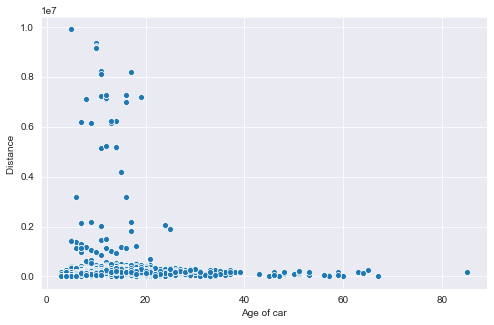

In [148]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Age of car'],df['Distance '])
plt.show()
# Higher age of car does not increase the distance covered 

**Engine Power**

skoda octavia


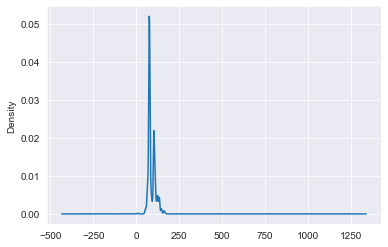

skoda superb


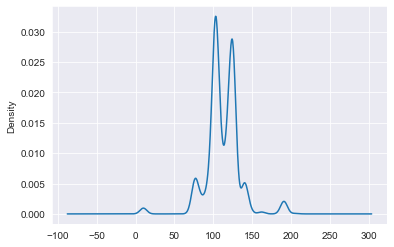

skoda yeti


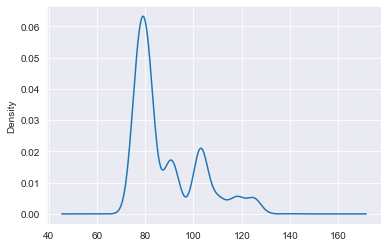

skoda citigo


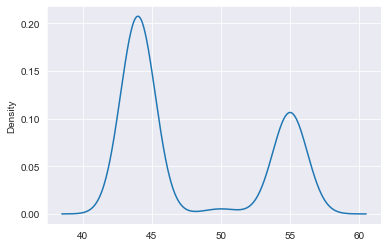

skoda roomster


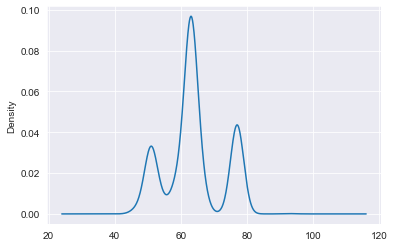

skoda rapid


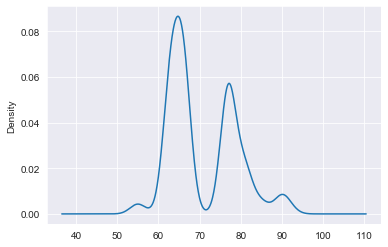

fiat panda


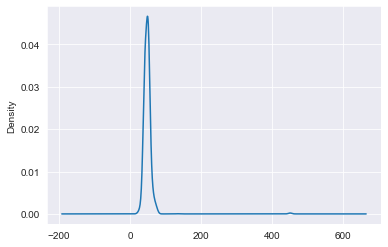

fiat coupe


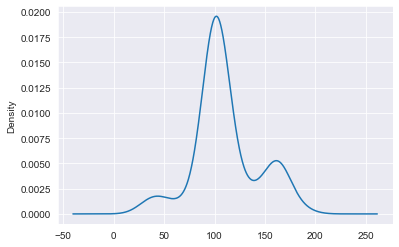

bmw x1


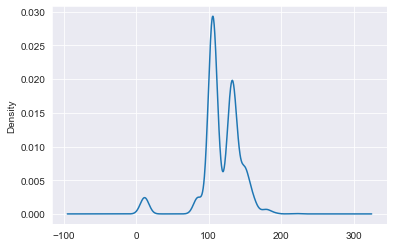

bmw x5


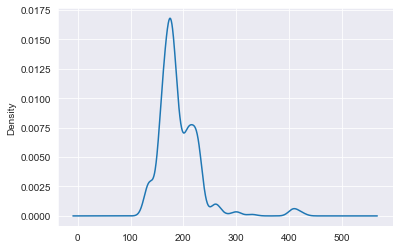

bmw x3


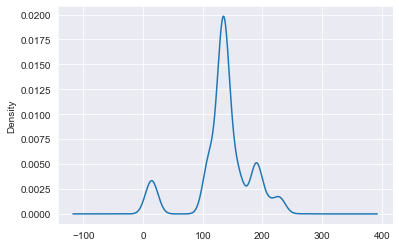

nissan juke


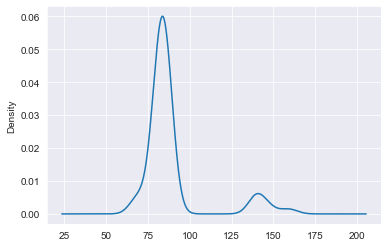

nissan qashqai


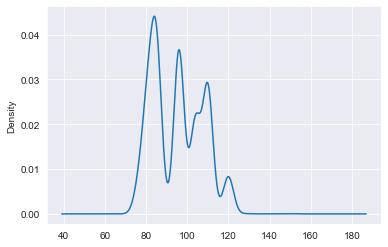

nissan micra


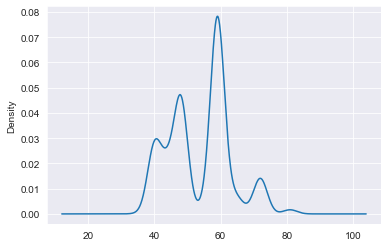

audi coupe


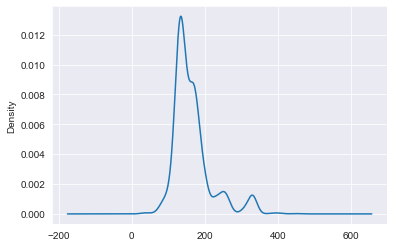

audi q3


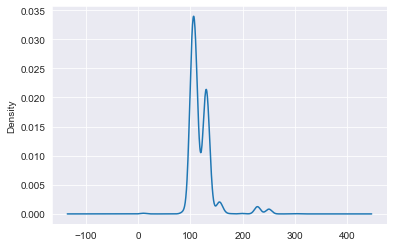

audi q5


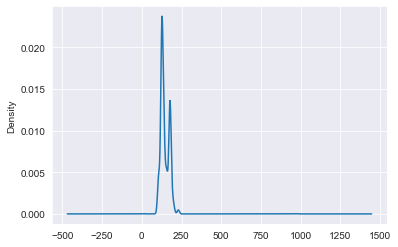

audi q7


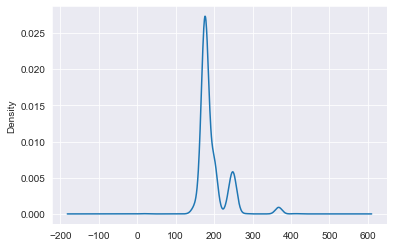

audi tt


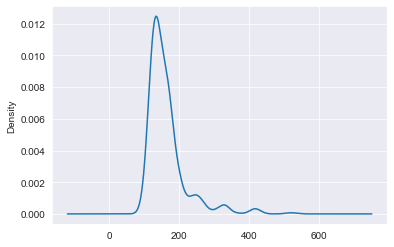

toyota aygo


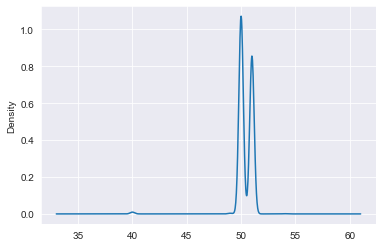

toyota auris


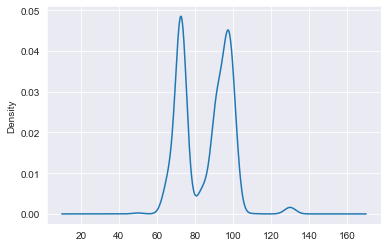

toyota avensis


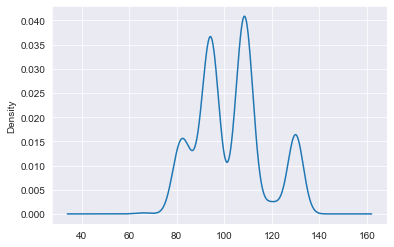

toyota yaris


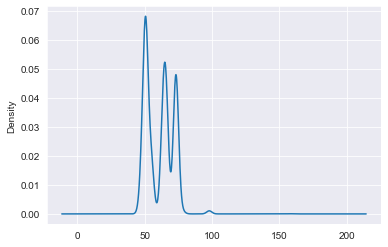

hyundai coupe


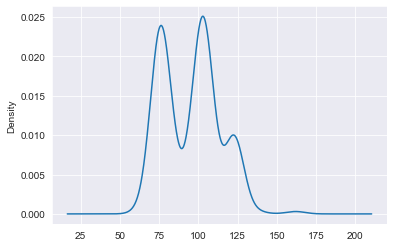

hyundai i30


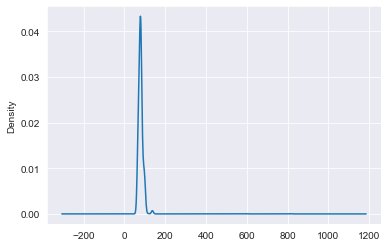

maserati coupe


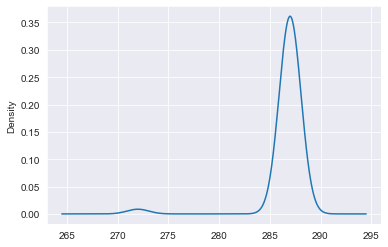

In [149]:
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            df[(df['Maker']==i) & (df['model']==j)]['engine_power'].plot(kind='kde')
            plt.show()

The data is skewed we will fill the null with the median values.

In [150]:
# Median od each category
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            print(df[(df['Maker']==i) & (df['model']==j)]['engine_power'].median())
            print()

skoda octavia
77.0

skoda superb
110.0

skoda yeti
81.0

skoda citigo
44.0

skoda roomster
63.0

skoda rapid
66.0

fiat panda
51.0

fiat coupe
102.0

bmw x1
110.0

bmw x5
180.0

bmw x3
135.0

nissan juke
85.0

nissan qashqai
96.0

nissan micra
59.0

audi coupe
147.0

audi q3
110.0

audi q5
140.0

audi q7
180.0

audi tt
147.0

toyota aygo
50.0

toyota auris
91.0

toyota avensis
105.0

toyota yaris
64.0

hyundai coupe
100.0

hyundai i30
80.0

maserati coupe
287.0



In [151]:
# Filling null with median
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            df.loc[(df['Maker']==i) & (df['model']==j),'engine_power']=df.loc[(df['Maker']==i) & (df['model']==j),'engine_power'].fillna(df.loc[(df['Maker']==i) & (df['model']==j),'engine_power'].median())
            

In [152]:
df.isnull().sum()[df.isnull().sum()>0]

Distance     1339
Price        5615
dtype: int64

**Distance**

skoda octavia


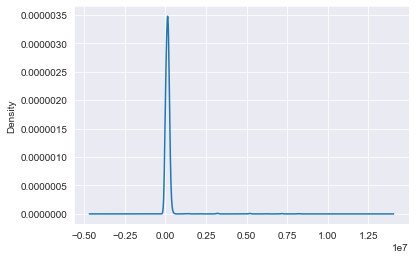

skoda superb


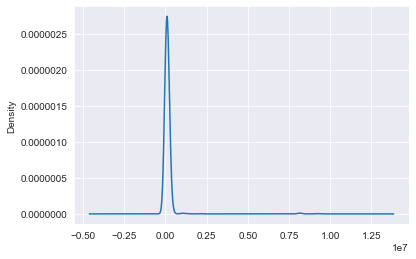

skoda yeti


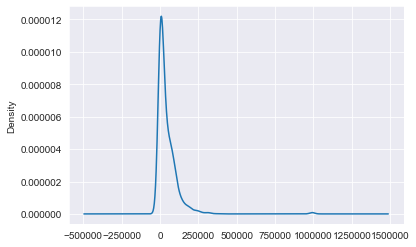

skoda citigo


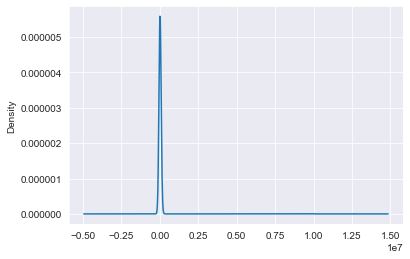

skoda roomster


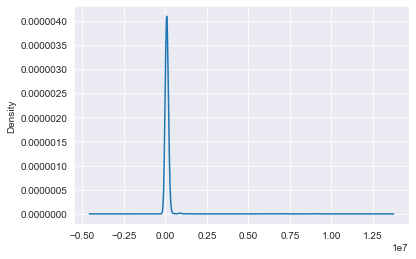

skoda rapid


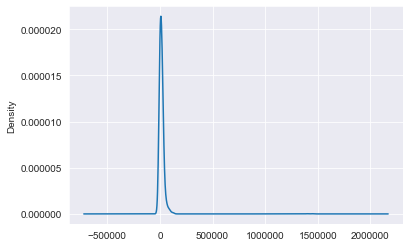

fiat panda


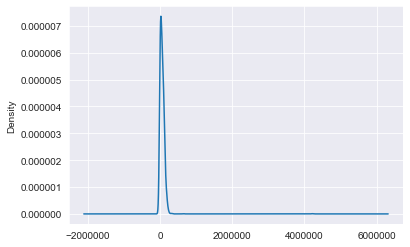

fiat coupe


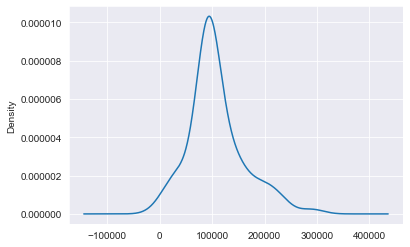

bmw x1


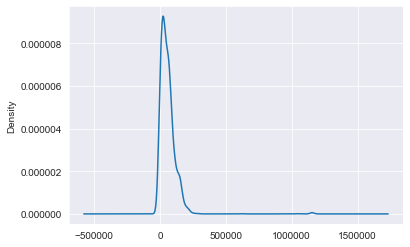

bmw x5


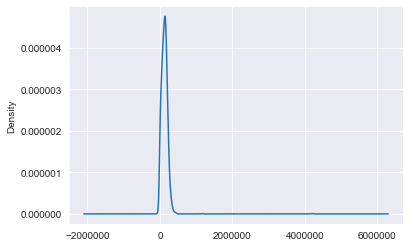

bmw x3


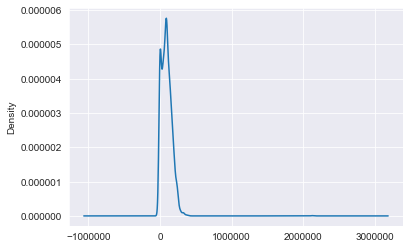

nissan juke


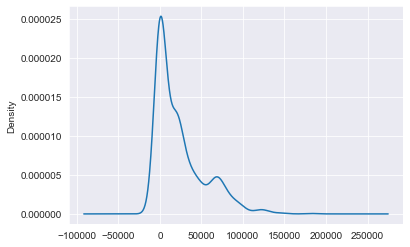

nissan qashqai


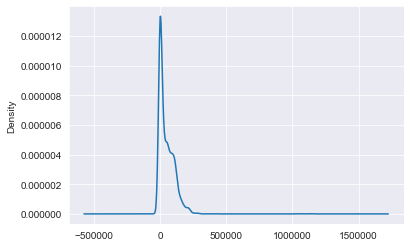

nissan micra


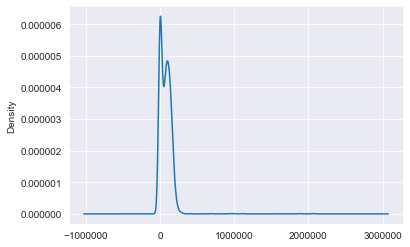

audi coupe


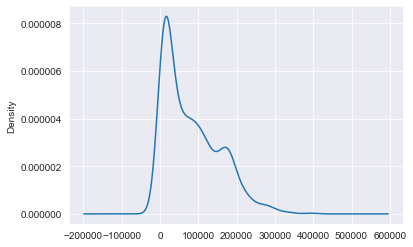

audi q3


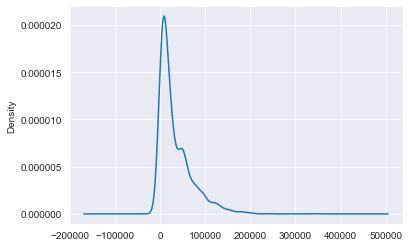

audi q5


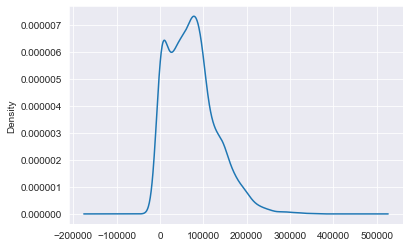

audi q7


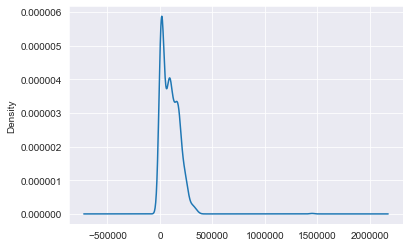

audi tt


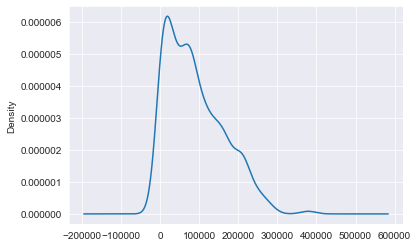

toyota aygo


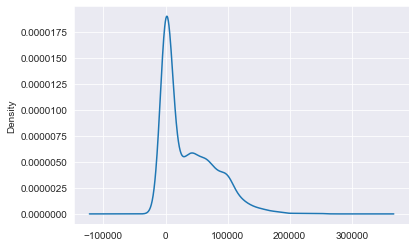

toyota auris


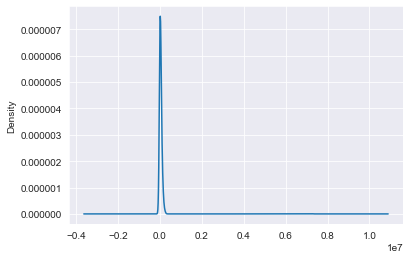

toyota avensis


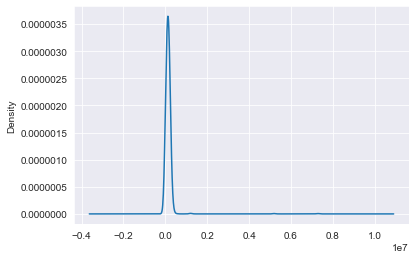

toyota yaris


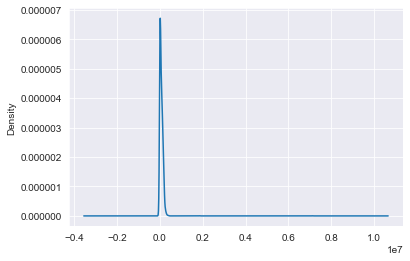

hyundai coupe


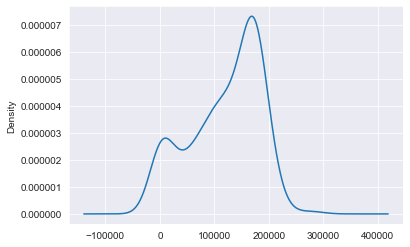

hyundai i30


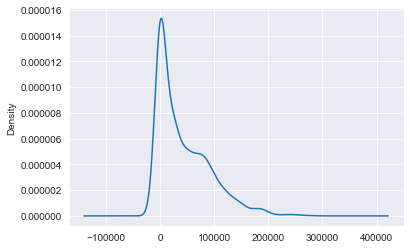

maserati coupe


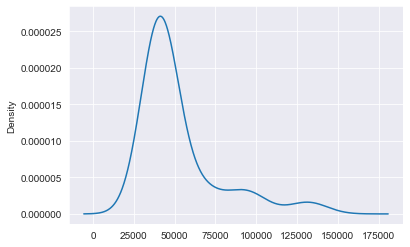

In [153]:
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            df[(df['Maker']==i) & (df['model']==j)]['Distance '].plot(kind='kde')
            plt.show()

The data is skewed, hence we will fill the null values with the median values.

In [154]:
# Median distance of each category
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            print(i,j)
            print(df[(df['Maker']==i) & (df['model']==j)]['Distance '].median())
            print()

skoda octavia
139000.0

skoda superb
103000.0

skoda yeti
21801.0

skoda citigo
5000.0

skoda roomster
80550.0

skoda rapid
12250.0

fiat panda
52194.0

fiat coupe
91000.0

bmw x1
48000.0

bmw x5
127613.0

bmw x3
89700.0

nissan juke
15635.0

nissan qashqai
28180.0

nissan micra
75107.0

audi coupe
63750.0

audi q3
19400.0

audi q5
69870.0

audi q7
89032.5

audi tt
76500.0

toyota aygo
21000.0

toyota auris
23500.0

toyota avensis
124300.0

toyota yaris
49500.0

hyundai coupe
138000.0

hyundai i30
25429.5

maserati coupe
41000.0



In [155]:
# Filling na
for i in df['Maker'].unique():
    for j in df['model'].unique():
        if len(df[(df['Maker']==i) & (df['model']==j)])>0:
            df.loc[(df['Maker']==i) & (df['model']==j),'Distance ']=df.loc[(df['Maker']==i) & (df['model']==j),'Distance '].fillna(df.loc[(df['Maker']==i) & (df['model']==j),'Distance '].median())
            

In [156]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                  0
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power              0
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                  5615
data                      0
dtype: int64

All the null values have been treated. The only one left in price are those which we have to predict. 

In [157]:
objects=[]
for i in df.drop('data',1).columns:
    if df[i].dtype=='O':
        objects.append(i)
objects 


['Maker', 'model', 'Location', 'transmission', 'fuel_type']

### Correlation

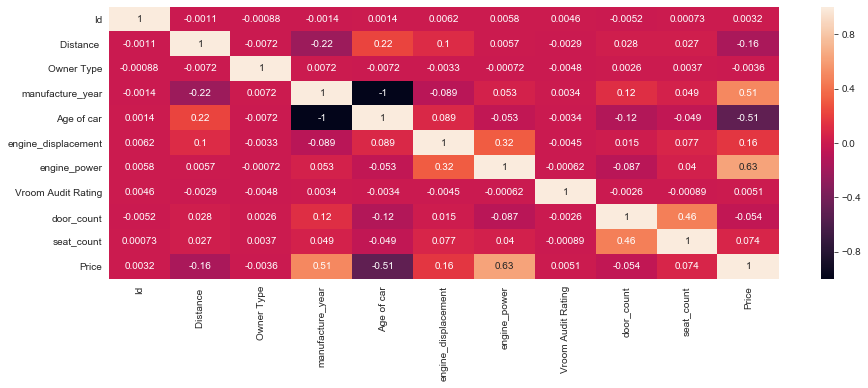

In [158]:
corr=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)
bottom, top = plt.ylim()
plt.ylim((bottom + 0.5, top - 0.5))
plt.show()

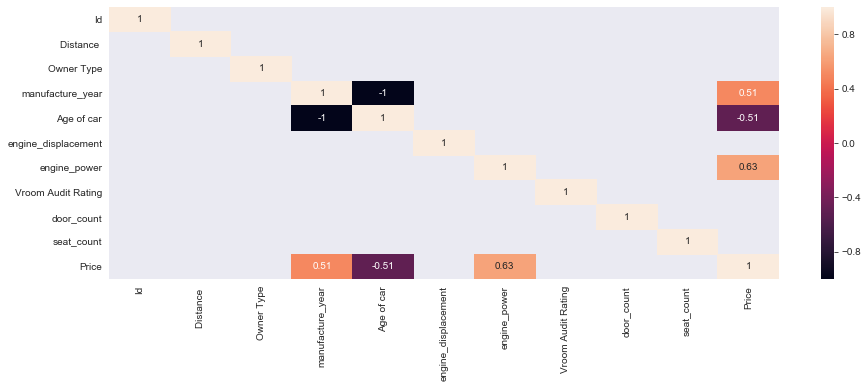

In [159]:
# With only high correlation 
corr=df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr[abs(corr)>0.5],annot=True)
bottom, top = plt.ylim()
plt.ylim((bottom + 0.5, top - 0.5))
plt.show()

In [160]:
(df['manufacture_year']+df['Age of car']).unique()

array([2019], dtype=int64)

* Price have high correlation with 'engine_power', 'manufacture_year' and 'Age of car'.
* It is very evident that 'manufacture_year' and 'Age of car' gives the same information so we drop 'Age of car'.

In [161]:
df=df.drop('manufacture_year',axis=1)
df.head()

,Id,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price,data
0,25001,skoda,octavia,Ahmedabad,139000.0,2,55,1964,147.0,8,man,4,5,petrol,543764.25,train
1,25002,fiat,panda,Ahmedabad,27750.0,3,7,1242,51.0,6,man,4,4,petrol,401819.25,train
2,25003,bmw,x1,Hyderabad,46000.0,3,5,1995,105.0,7,auto,4,5,diesel,2392855.50,train
3,25004,nissan,juke,Mumbai,43949.0,3,8,1618,140.0,7,man,4,5,petrol,958606.50,train
4,25005,bmw,x5,Jaipur,59524.0,4,7,2993,180.0,7,auto,4,5,diesel,3085561.50,train


### Splliting the data into train and test

In [162]:
print('combined',df.shape)
print('train',train.shape)
print('test',test.shape)

combined (59130, 16)
train (53515, 18)
test (5615, 17)


In [163]:
train1 = df[df['data']=='train']
train1=train1.drop(['data','Id'],axis=1)

test1 = df[df['data']=='test']
test1=test1.drop(['data','Id'],axis=1)

print('train1',train1.shape)
print('test1',test1.shape)

train1 (53515, 14)
test1 (5615, 14)


In [164]:
X_train=train1.drop('Price',1)
y_train=train1['Price']

X_test=test1.drop('Price',1)
y_test=test1['Price']

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)


X_train (53515, 13)
y_train (53515,)
X_test (5615, 13)
y_test (5615,)


### Treating skewed data

In [165]:
# Checking for the columns whose skewness lies outside -0.5 and +0.5.
X_train.skew()[abs(X_train.skew())>0.5]

Distance               23.580487
Age of car              1.912556
engine_displacement    12.730460
engine_power            1.770366
door_count             -1.466251
seat_count             -1.933890
dtype: float64

In [166]:
skewed=[]
for i in X_train.columns:
    if (X_train[i].dtype=='int64') or (X_train[i].dtype=='float64') :
        if abs(X_train[i].skew())>0.5:
            skewed.append(i)
skewed    

['Distance ',
 'Age of car',
 'engine_displacement',
 'engine_power',
 'door_count',
 'seat_count']

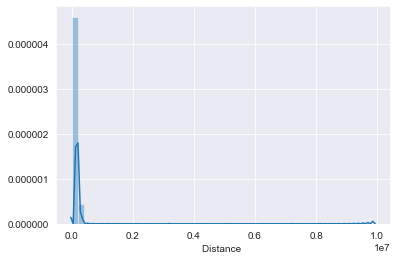

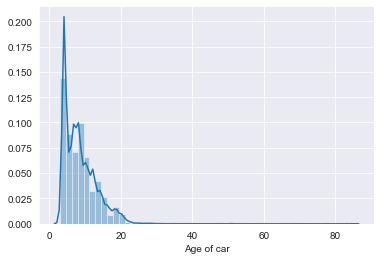

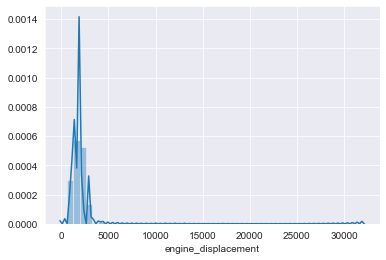

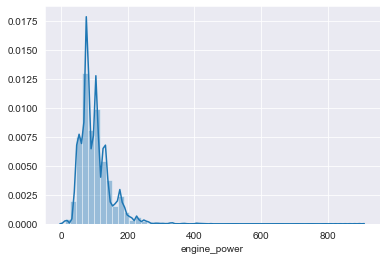

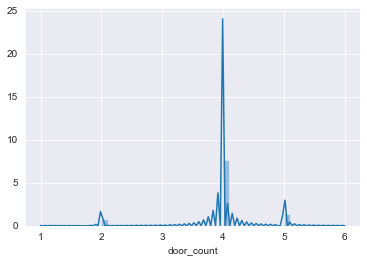

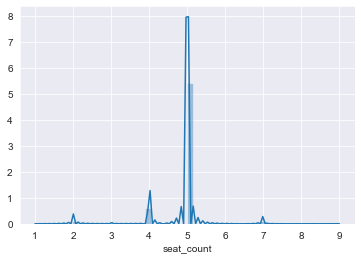

In [167]:
# Distribution of highly skewed features.
for i in skewed :
    sns.distplot(X_train[i])
    plt.show()

In [168]:
# To use boxcox the data must be positive, so we check if the minimum values is less than 0 or not
negative=[]
for i in skewed:
    if X_train[i].min()<=0:
        negative.append(i)
negative 

['Distance ']

* Only distance have the minimum distance as 0, it is possible as they might not have used the car at all but it is rare.

In [169]:
# Since Distance  have 0 value we make the minimum value to 1
for i in negative:
    X_train[i]=(X_train[i]-X_train[i].min()+1)
    X_test[i]=(X_test[i]-X_test[i].min()+1)

In [170]:
# Checking 
for i in skewed:
    if X_train[i].min()<=0:
        print(i)
# No more columns have negative/ 0 value.

### Box Cox

In [171]:
# Now we apply boxcox to the skewed columns
from scipy import stats 
from scipy.stats import boxcox
lambdas={}
for i in skewed:
    X_train[i],lambdas[i]=stats.boxcox(X_train[i])
    X_test[i] = stats.boxcox(X_test[i], lambdas[i]) # using lambdas of train data in test dat
    

In [172]:
skewed_check=[]
for i in X_train.columns:
    if (X_train[i].dtype=='int64') or (X_train[i].dtype=='float64') :
        if abs(X_train[i].skew())>0.5:
            skewed_check.append(i)
skewed_check 

['engine_displacement', 'seat_count']

In [173]:
X_train.skew()

Distance              -0.189125
Owner Type             0.001013
Age of car             0.046014
engine_displacement   -0.542711
engine_power           0.040456
Vroom Audit Rating     0.004991
door_count             0.132150
seat_count             0.956458
dtype: float64

In [174]:
# Skewness of all the columns have reduced significantly.

### Encoding

In [175]:
# Making a copy 
X_train_safe=X_train.copy()
X_test_safe=X_test.copy()


In [176]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

### Standard Scaling

In [179]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test  = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb


models = []
models.append(('RFC', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('XGBoost', XGBRegressor()))
models.append(('LightGB', lgb.LGBMRegressor()))



In [110]:
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores

{'RFC': '0.926159 (0.018458)',
 'KNN': '0.798530 (0.014617)',
 'XGBoost': '0.926970 (0.015962)',
 'LightGB': '0.926259 (0.016358)'}

In [459]:
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores

{'CART': '-88303317983.630707 (19298679738.569237)',
 'RFC': '-53628985150.048050 (14032000773.993118)',
 'KNN': '-115284088815.008698 (12670387184.724171)',
 'XGBoost': '-52763083437.340378 (11882802096.267450)',
 'GBoost': '-64852122827.954689 (12900047301.834425)',
 'LightGB': '-52819330879.112411 (12755079858.809937)'}

In [187]:
from scipy.stats import randint as sp_randint
best_models=[]

best_models.append(('RFC', RandomForestRegressor(),{'n_estimators':sp_randint(10,500),'max_depth':sp_randint(5,30),'min_samples_split':sp_randint(50,500)}))
#best_models.append(('XGBoost', XGBRegressor(),{'learning_rate':np.linspace(0.001,10),'n_estimators':sp_randint(50,500),'max_depth':sp_randint(5,30),} ))
#best_models.append(('LightGB', lgb.LGBMRegressor(),{'learning_rate':np.linspace(0.001,100),'n_estimators':sp_randint(10,500), 'max_depth':sp_randint(5,30)}))



In [188]:
from sklearn import model_selection 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

best_params={}
for name, model,params in best_models:
    rsearch= RandomizedSearchCV(model,param_distributions=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
    rsearch.fit(X_train, y_train)
    best_params[name]=rsearch.best_params_
best_params

{'RFC': {'max_depth': 15, 'min_samples_split': 65, 'n_estimators': 428}}

In [189]:
best_models_tuned=[]

best_models_tuned.append(('RFC', RandomForestRegressor(**best_params['RFC'])))
#best_models_tuned.append(('XGBoost', XGBRegressor(**best_params['XGBoost'])))
#best_models_tuned.append(('LightGB', lgb.LGBMRegressor(**best_params['LightGB'])))

In [190]:
from sklearn import model_selection 
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in best_models_tuned:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores
    

{'RFC': '0.923656 (0.017419)'}

### Prediction

In [191]:
RFC =RandomForestRegressor(**best_params['RFC'])
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(RFC, X_train, y_train, cv=5)
print('CV Score:',cv_score.mean())

y_pred_RFC

CV Score: 0.9238041521200901


array([ 380233.47562506, 1030277.8052564 , 1492596.22000419, ...,
        369289.94147782, 1082528.73006947,  573334.50482385])

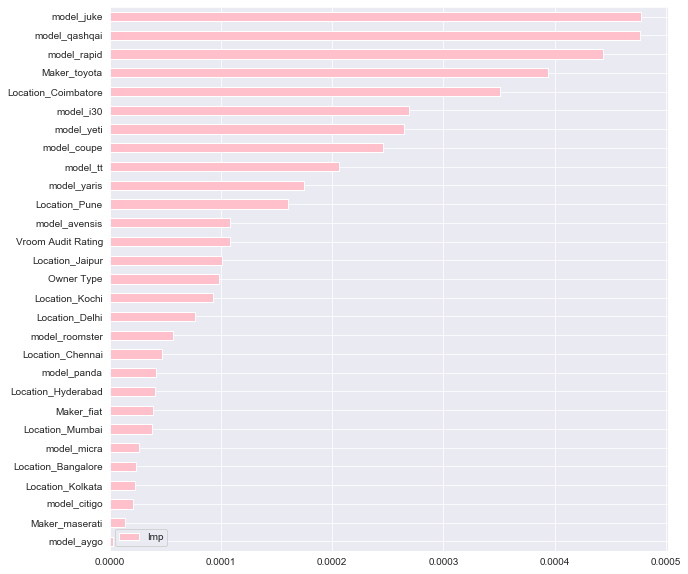

In [214]:
imp=pd.DataFrame(RFC.feature_importances_,index=X_train.columns,columns=['Imp'])
imp.sort_values(by='Imp',ascending=True)[0:29].plot(kind='barh',color='pink',figsize=(10,10),fontsize=10)
plt.show()